In [1]:
from pathlib import Path
import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_all = pd.read_csv('../reports/lstm_tuning_windows/results.csv')

In [3]:
df_single = df_all[~df_all['ensemble']]

In [4]:
df_single

,input_len,direction,size,depth,num,epoch,ensemble,smape,mase*
0,18,bi,128,2,2.0,1,False,13.407468,2.709261
2,18,bi,128,2,2.0,2,False,13.329723,2.718411
4,18,bi,128,2,2.0,3,False,13.420433,2.757398
6,18,bi,128,2,2.0,4,False,13.355976,2.730680
8,18,bi,128,2,2.0,5,False,14.741308,3.038095
...,...,...,...,...,...,...,...,...,...
4820,18,uni,64,4,6.0,6,False,13.335731,2.703827
4822,18,uni,64,4,6.0,7,False,18.269536,3.605566
4824,18,uni,64,4,6.0,8,False,13.510938,2.733909
4826,18,uni,64,4,6.0,9,False,13.520031,2.707653


<AxesSubplot:xlabel='epoch', ylabel='smape'>

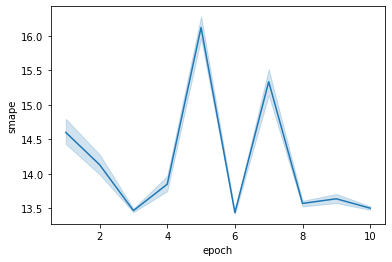

In [5]:
sns.lineplot(x='epoch', y='smape', data=df_single)

In [7]:
df_single['name'] = df_single.apply(lambda x: '{}_{}_{}_{}'.format(x['direction'], x['size'], 
                                                                   x['depth'], x['num']), axis=1)

/home/thanos/.envs/aug/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


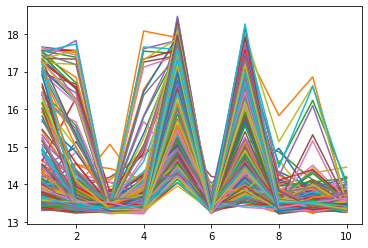

In [9]:
for n in df_single['name'].unique():
    exp = df_single[df_single['name'] == n]
    plt.plot(exp['epoch'], exp['smape'])

In [11]:
best = df_single[(df_single['direction'] == 'bi') & 
                 (df_single['size'] == 128) &
                 (df_single['depth'] == 2)]

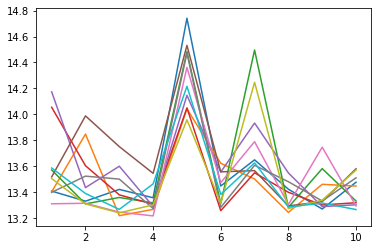

In [13]:
for n in best['name'].unique():
    exp = best[best['name'] == n]
    plt.plot(exp['epoch'], exp['smape'])

In [15]:
best['name'].unique()

array(['bi_128_2_2.0', 'bi_128_2_8.0', 'bi_128_2_5.0', 'bi_128_2_3.0',
       'bi_128_2_0.0', 'bi_128_2_9.0', 'bi_128_2_4.0', 'bi_128_2_6.0',
       'bi_128_2_1.0', 'bi_128_2_7.0'], dtype=object)

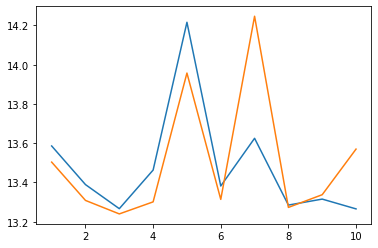

In [16]:
plt.plot(exp['epoch'], exp['smape'])
exp = best[best['name'] == 'bi_128_2_1.0']
plt.plot(exp['epoch'], exp['smape'])

In [8]:
df_all.sort_values('smape')

,input_len,direction,size,depth,num,epoch,ensemble,smape,mase*
1804,18,bi,64,2,7.0,8,False,13.214484,2.677305
136,18,bi,128,2,4.0,4,False,13.215907,2.673131
34,18,bi,128,2,8.0,3,False,13.217688,2.679263
2090,18,bi,64,3,9.0,6,False,13.221468,2.676773
1904,18,bi,64,3,5.0,8,False,13.228910,2.676619
...,...,...,...,...,...,...,...,...,...
2888,18,uni,128,4,2.0,5,False,18.186094,3.591660
4822,18,uni,64,4,6.0,7,False,18.269536,3.605566
2848,18,uni,128,4,0.0,5,False,18.345795,3.634925
2738,18,uni,128,4,3.0,5,False,18.438642,3.664549


In [23]:
df = df_all[df_all['ensemble'] == True]

In [24]:
df['name'] = df.apply(lambda x: '{}_{}_{}_{}'.format(x['direction'], x['size'], 
                                                                   x['depth'], x['num']), axis=1)

/home/thanos/.envs/aug/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [25]:
df2 = df[~df['num'].isna()]

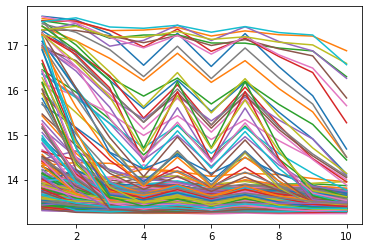

In [26]:
for n in df2['name'].unique():
    exp = df2[df2['name'] == n]
    plt.plot(exp['epoch'], exp['smape'])

In [32]:
best = df2[(df2['direction'] == 'bi') & 
                 (df2['size'] == 128) &
                 (df2['depth'] == 2)]

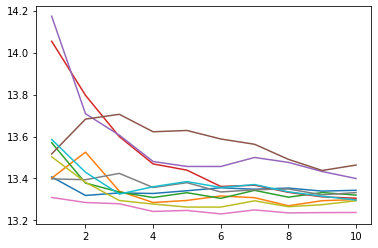

In [33]:
for n in best['name'].unique():
    exp = best[best['name'] == n]
    plt.plot(exp['epoch'], exp['smape'])

In [31]:
df_single[df_single['epoch'] == 10]['smape'].mean()

13.502622106050191

<AxesSubplot:xlabel='epoch', ylabel='smape'>

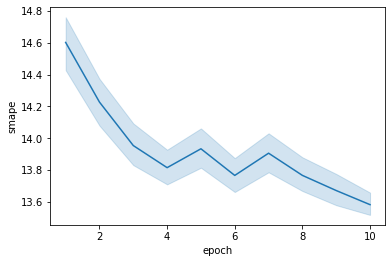

In [27]:
sns.lineplot(x='epoch', y='smape', data=df2)

In [34]:
df3 = df[df['num'].isna()]

In [37]:
best = df3[(df3['direction'] == 'bi') & 
                 (df3['size'] == 128) &
                 (df3['depth'] == 2)]

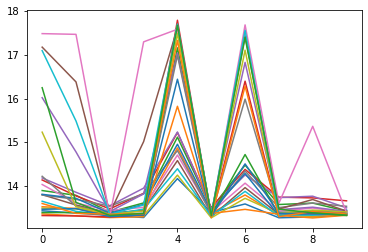

In [36]:
for n in df3['name'].unique():
    exp = df3[df3['name'] == n]
    plt.plot(exp['epoch'], exp['smape'])

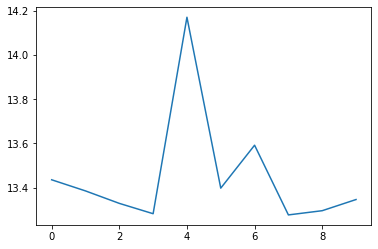

In [38]:
for n in best['name'].unique():
    exp = best[best['name'] == n]
    plt.plot(exp['epoch'], exp['smape'])